# Is it possible to predict the kernel simply by observing the data?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.signal

def exp_ker(t, tau):
    return np.exp(-t/tau)/tau

def imshow_ax(fig, ax, mat):
    im = ax.imshow(mat)
    div = make_axes_locatable(ax)
    divAx = div.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=divAx, orientation='vertical')

def kernelMatrix(kernel, nSig):
    nKer = len(kernel)
    H = np.zeros((nSig, nSig))
    for i in range(nSig):
        l = np.max([i+1-nKer, 0])
        r = i+1
        H[i, l:r] = np.flip(kernel[:r])
    return H

# Moore-Penrose pseudoinverse
def moorePenroseTikhonov(H, reg=0.005):
    return np.linalg.inv(H.T.dot(H) + reg*np.eye(H.shape[0])).dot(H.T)

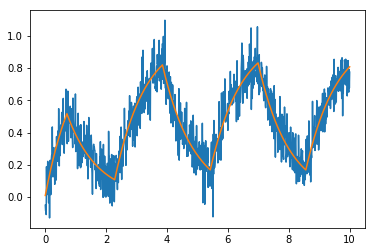

In [5]:
# Problem size
T_SIGNAL = 10
T_KERNEL = T_SIGNAL / 2

DT = 0.01
t_signal = np.arange(0, T_SIGNAL + DT, DT)
t_kernel = np.arange(0, T_KERNEL + DT, DT)
NPOINT = len(t_signal)

# Box Signal
signal = np.zeros(NPOINT)
signal[np.sin(t_signal - 1.5)**2 > 0.5] = 1

# Kernel
TAU = 1.0
kernel = exp_ker(t_kernel, TAU)
kernel /= np.sum(kernel)

# Convolve
sig_conv = scipy.signal.convolve(signal, kernel, mode='full')[:NPOINT]

# add noise
sig_conv_noise = sig_conv + 0.1 * np.random.normal(0, 1, len(sig_conv))

plt.figure()
plt.plot(t_signal, sig_conv_noise)
plt.plot(t_signal, sig_conv)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


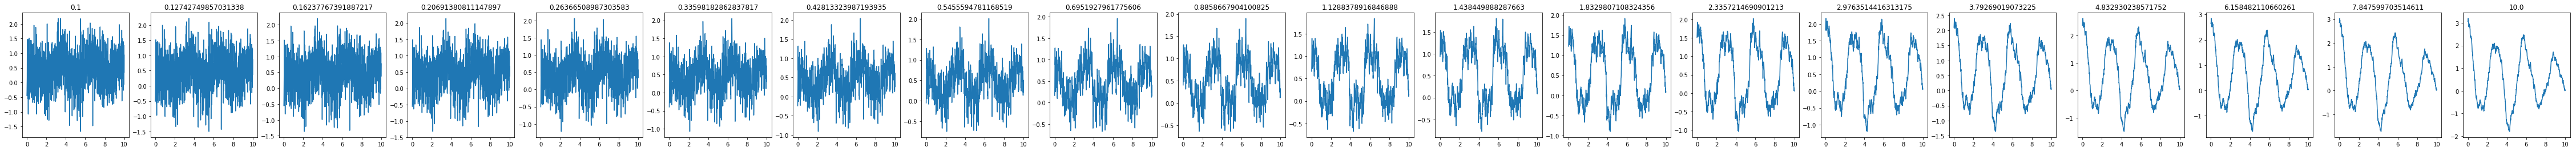

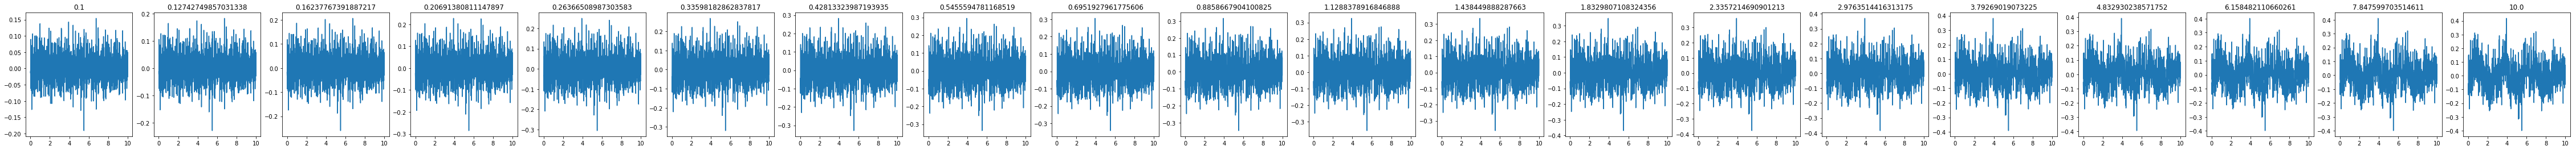

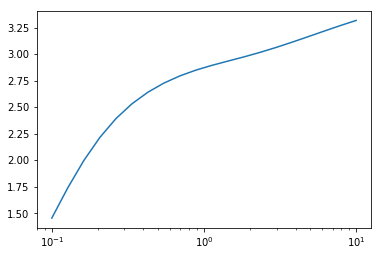

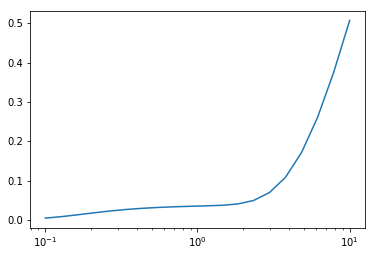

In [19]:
nTest = 20
tauKerTest = TAU * 10 ** np.linspace(-1, 1, 20)

fig, ax = plt.subplots(ncols=nTest, figsize=(4*nTest, 4))

fig2, ax2 = plt.subplots(ncols=nTest, figsize=(4*nTest, 4))

errTest = []
autoVarTest = []
for iTest, tauThis in enumerate(tauKerTest):
    print(iTest)
    kernelThis = exp_ker(t_kernel, tauThis)
    kernelThis /= np.sum(kernelThis)

    H = kernelMatrix(kernelThis, NPOINT)
    H_pseudo = moorePenroseTikhonov(H)
    yEst = H_pseudo.dot(sig_conv_noise)
    residual = sig_conv_noise - H.dot(yEst)
    autocorr = np.correlate(residual, residual, mode='full')[NPOINT:]
    lpf_var = np.correlate(residual, residual, mode='full')[NPOINT:]
    
    ax[iTest].plot(t_signal, yEst)
    ax[iTest].set_title(str(tauThis))
    
    ax2[iTest].plot(t_signal, residual)
    ax2[iTest].set_title(str(tauThis))
    
    errTest += [np.linalg.norm(residual)]
    autoVarTest += [np.var(autocorr)]
    
plt.figure()
plt.semilogx(tauKerTest, errTest)
plt.show()
    
plt.figure()
plt.semilogx(tauKerTest, autoVarTest)
plt.show()